In [1]:
#!pip install cartopy
#!pip install matplotlib
#!pip install xarray

In [2]:
import cartopy.crs as ccrs
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
gebco_fp = 'D:/data/gebco/GEBCO_2024.nc'
data_fp = 'D:/data/onc/TWDP/gridded/qoa_flowthrough_2003-2006_gridded.nc'

## Import Data

In [4]:
data = xr.open_dataset(data_fp)
transit = data.sel(transit_id = datetime(2004,6,1,12), method = 'nearest') # Select transit that occurred closes to 12pm on 2004-06-01.

tx = transit.longitude
ty = transit.latitude
tz = transit.sea_water_density

## Import GEBCO

In [5]:
gebco = xr.open_dataset(gebco_fp)
gebco = gebco[['elevation']]
gebco = gebco.sel(lat = slice(48.9,49.4), lon = slice(-124,-123))
gebco['depth'] = gebco.elevation * -1

gx = gebco.lon
gy = gebco.lat
gz = gebco.depth

gcmap = matplotlib.colormaps.get_cmap('terrain_r')
gcmap.set_under('gray')

crs = ccrs.Mercator()

In [6]:

class Tsawwassen:
    lat: float = 49.006621
    lon: float = -123.132309

class DukePoint:
    lat: float = 49.162529
    lon: float = -123.891036

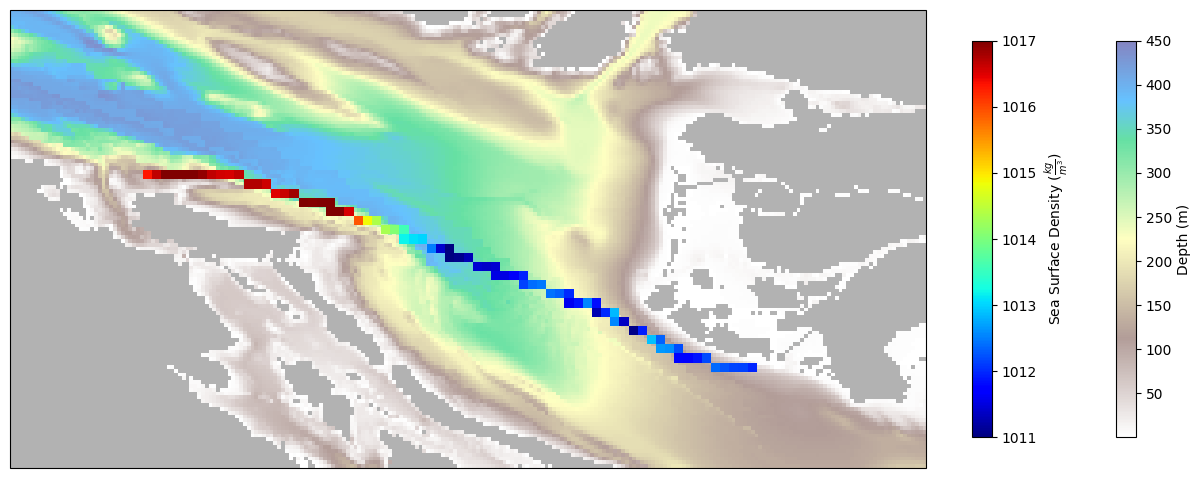

In [7]:
fig, ax = plt.subplots(1,1, figsize = (12,10), constrained_layout = True, subplot_kw={'projection': crs})

gebco_mesh = ax.pcolormesh(gx, gy, gz, cmap = gcmap, vmin = 0.0001, vmax = 450, zorder = 0, alpha = 0.6)
fig.colorbar(gebco_mesh, ax = ax, label = 'Depth (m)', shrink = 0.4)

data_mesh = ax.pcolormesh(tx, ty, tz, cmap = 'jet', vmin = 1011, vmax =  1017)
fig.colorbar(data_mesh, ax = ax, label = r'Sea Surface Density ($\frac{kg}{m^3}$)', shrink = 0.4)